In [1]:
#Use processed multiple sequence alignment with stereochemistry and reactivity annotations to train ML model
import os
from supervised.automl import AutoML
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

fc-list: /home/azamh/miniconda3/bin/../lib/././libz.so.1: version `ZLIB_1.2.9' not found (required by /home/azamh/miniconda3/bin/../lib/././libpng16.so.16)


In [2]:
#Arguments
resultsdir = '../automl_stereo'
pruned_msa_df = pd.read_excel(f'../../msa/alignment/pruned_msa_df.xlsx', header = 0, index_col = 0)
pruned_resi_df = pd.read_excel(f'../../msa/alignment/pruned_resi_df.xlsx', header = 0, index_col = 0)
asr_seq_annotations = pd.read_excel('../../si_data/asr_seq_annotations.xlsx', header = 0, index_col = 0)
assert asr_seq_annotations.index.equals(pruned_msa_df.index)

In [3]:
#Create autoML object
automl_stereo = AutoML(
    mode = 'Perform',          #Do hyperparameter tuning
    total_time_limit=3600,     #1 hour
    results_path = resultsdir,
    explain_level = 2,         #Calculate SHAP values
    algorithms = [
                "Xgboost",
                "Random Forest",
                "CatBoost",
            ],
    golden_features=False)

<AxesSubplot: xlabel='average_pred_stereo', ylabel='count'>

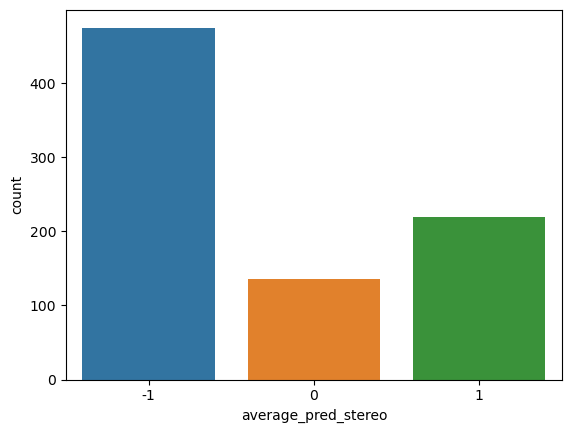

In [4]:
#Fit model to stereochemistry
sns.countplot(asr_seq_annotations, x = 'average_pred_stereo')

In [5]:
#Fit automl (delete automl_stereo folder to rerun)
automl_stereo.fit(pruned_msa_df, asr_seq_annotations['average_pred_stereo'])

AutoML directory: ../automl_stereo
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Xgboost', 'Random Forest', 'CatBoost']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 3 models


fc-list: /home/azamh/miniconda3/bin/../lib/././libz.so.1: version `ZLIB_1.2.9' not found (required by /home/azamh/miniconda3/bin/../lib/././libpng16.so.16)
fc-list: /home/azamh/miniconda3/bin/../lib/././libz.so.1: version `ZLIB_1.2.9' not found (required by /home/azamh/miniconda3/bin/../lib/././libpng16.so.16)
fc-list: /home/azamh/miniconda3/bin/../lib/././libz.so.1: version `ZLIB_1.2.9' not found (required by /home/azamh/miniconda3/bin/../lib/././libpng16.so.16)
fc-list: /home/azamh/miniconda3/bin/../lib/././libz.so.1: version `ZLIB_1.2.9' not found (required by /home/azamh/miniconda3/bin/../lib/././libpng16.so.16)


1_Default_Xgboost logloss 0.659115 trained in 144.14 seconds (1-sample predict time 0.4343 seconds)


TBB Warning: The number of workers is currently limited to 3. The request for 19 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

TBB Warning: The number of workers is currently limited to 3. The request for 19 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

TBB Warning: The number of workers is currently limited to 3. The request for 19 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

TBB Warning: The number of workers is currently limited to 3. The request for 19 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

TBB Warning: The number of workers is currently limited to 3. The request for 19 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.



2_Default_CatBoost logloss 0.639624 trained in 92.26 seconds (1-sample predict time 0.0418 seconds)
3_Default_RandomForest logloss 0.63676 trained in 98.53 seconds (1-sample predict time 0.4934 seconds)
* Step not_so_random will try to check up to 12 models
4_Xgboost logloss 0.65824 trained in 140.79 seconds (1-sample predict time 0.4512 seconds)
8_CatBoost logloss 0.64949 trained in 38.7 seconds (1-sample predict time 0.0428 seconds)
12_RandomForest logloss 0.635951 trained in 107.7 seconds (1-sample predict time 0.5056 seconds)
5_Xgboost logloss 0.671265 trained in 147.38 seconds (1-sample predict time 0.452 seconds)
9_CatBoost logloss 0.634913 trained in 81.93 seconds (1-sample predict time 0.0432 seconds)
13_RandomForest logloss 0.642283 trained in 121.19 seconds (1-sample predict time 0.5203 seconds)
6_Xgboost logloss 0.646651 trained in 149.11 seconds (1-sample predict time 0.4487 seconds)
10_CatBoost logloss 0.647652 trained in 119.14 seconds (1-sample predict time 0.0429 second

AutoML(algorithms=['Xgboost', 'Random Forest', 'CatBoost'], explain_level=2,
       golden_features=False, mode='Perform', results_path='../automl_stereo')